In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

**Context** :-

Currently there are no precise theoretical methods to predict mechanical properties of steels. All the methods available are by backed by statistics and extensive physical testing of the materials. Since testing each material with different composition is a highly tedious task (imagine the number of possibilities!), let's apply our knowledge of machine learning and statistics to solve this problem.


In [3]:
df=pd.read_csv('MatNavi Mechanical properties of low-alloy steels.csv')

This dataset contains compositions by weight percentages of low-alloy steels along with the temperatures at which the steels were tested and the values mechanical properties observed during the tests. The alloy code is a string unique to each alloy. Weight percentages of alloying metals and impurities like Aluminum, copper, manganese, nitrogen, nickel, cobalt, carbon, etc are given in columns. The temperature in celsius for each test is mentioned in a column. Lastly mechanical properties including tensile strength, yield strength, elongation and reduction in area are given in separate columns. The dataset contains 915 rows.

In [4]:
df

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,400,316,489,26,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,350,268,632,28,65
911,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,400,244,575,28,68
912,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,450,224,500,29,72
913,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,500,209,428,30,78


In [5]:
df.columns

Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

from the above dataframe we can conclude that properties are calculated by varing temparature and keeping alloy code constant(ie. alloy composion)

In [6]:
df[['Alloy code']].value_counts()['VbN']

10

## outlier removal

 C                             AxesSubplot(0.125,0.11;0.034292x0.77)
 Si                          AxesSubplot(0.16615,0.11;0.034292x0.77)
 Mn                         AxesSubplot(0.207301,0.11;0.034292x0.77)
 P                          AxesSubplot(0.248451,0.11;0.034292x0.77)
 S                          AxesSubplot(0.289602,0.11;0.034292x0.77)
 Ni                         AxesSubplot(0.330752,0.11;0.034292x0.77)
 Cr                         AxesSubplot(0.371903,0.11;0.034292x0.77)
 Mo                         AxesSubplot(0.413053,0.11;0.034292x0.77)
 Cu                         AxesSubplot(0.454204,0.11;0.034292x0.77)
V                           AxesSubplot(0.495354,0.11;0.034292x0.77)
 Al                         AxesSubplot(0.536504,0.11;0.034292x0.77)
 N                          AxesSubplot(0.577655,0.11;0.034292x0.77)
Ceq                         AxesSubplot(0.618805,0.11;0.034292x0.77)
Nb + Ta                     AxesSubplot(0.659956,0.11;0.034292x0.77)
 Temperature (°C)           AxesSu

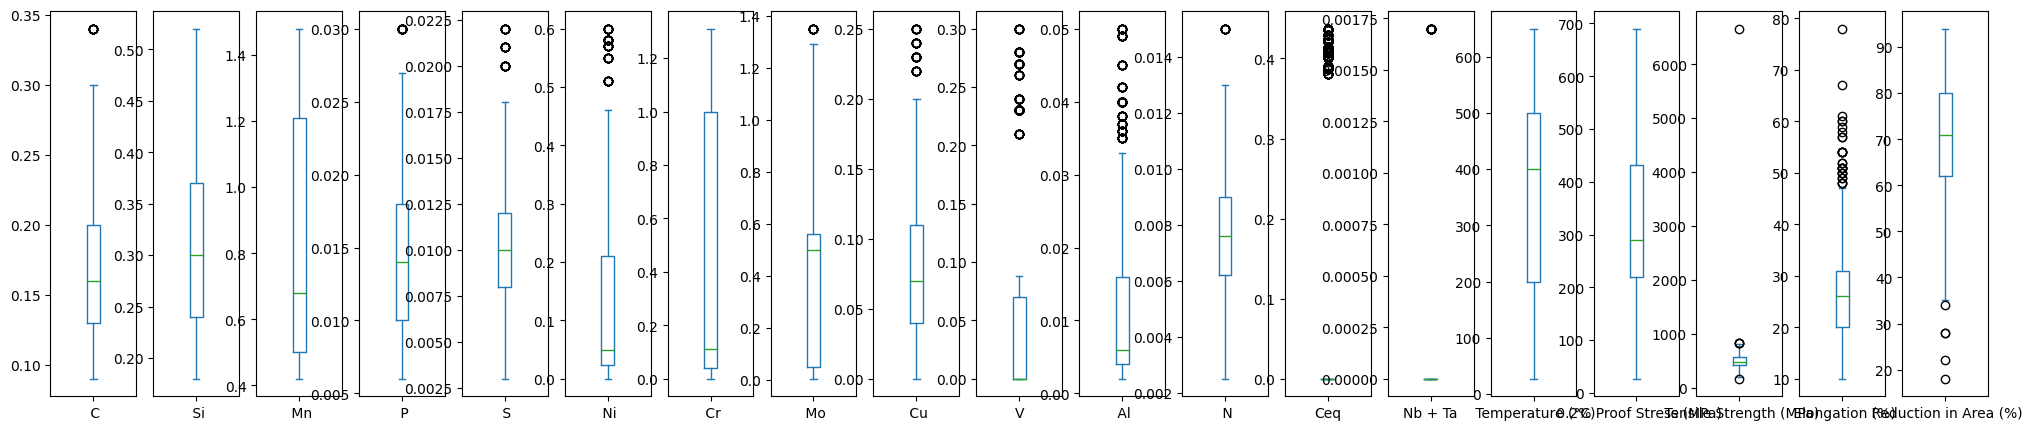

In [7]:
df.plot(kind='box',subplots=True,figsize=(25,5))

In [8]:
outliers=[]
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(df[' Tensile Strength (MPa)']) # ' Tensile Strength (MPa)',' Elongation (%)', ' Reduction in Area (%)'
print("Outliers from IQR method: ", (sample_outliers))

Outliers from IQR method:  [162, 820, 830, 830, 6661]


In [9]:
for i in range(-3,0):
  data = sorted(df.iloc[:,i])
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  # print(q1, q3)
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)
  for j in range(len(df.iloc[:,i])):
    if df.iloc[j,i] in detect_outliers_iqr(data):
      # print(j)
      df.iloc[j,i]=np.where(df.iloc[j,i]>upr_bound,upr_bound,np.where(df.iloc[j,i]<lwr_bound,lwr_bound,df.iloc[j,i]))
      # print(j)
df.iloc[:,-4:]

,0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,342,490,30.0,71
1,338,454,27.0,72
2,337,465,23.0,69
3,346,495,21.0,70
4,316,489,26.0,79
...,...,...,...,...
910,268,632,28.0,65
911,244,575,28.0,68
912,224,500,29.0,72
913,209,428,30.0,78


 C                             AxesSubplot(0.125,0.11;0.034292x0.77)
 Si                          AxesSubplot(0.16615,0.11;0.034292x0.77)
 Mn                         AxesSubplot(0.207301,0.11;0.034292x0.77)
 P                          AxesSubplot(0.248451,0.11;0.034292x0.77)
 S                          AxesSubplot(0.289602,0.11;0.034292x0.77)
 Ni                         AxesSubplot(0.330752,0.11;0.034292x0.77)
 Cr                         AxesSubplot(0.371903,0.11;0.034292x0.77)
 Mo                         AxesSubplot(0.413053,0.11;0.034292x0.77)
 Cu                         AxesSubplot(0.454204,0.11;0.034292x0.77)
V                           AxesSubplot(0.495354,0.11;0.034292x0.77)
 Al                         AxesSubplot(0.536504,0.11;0.034292x0.77)
 N                          AxesSubplot(0.577655,0.11;0.034292x0.77)
Ceq                         AxesSubplot(0.618805,0.11;0.034292x0.77)
Nb + Ta                     AxesSubplot(0.659956,0.11;0.034292x0.77)
 Temperature (°C)           AxesSu

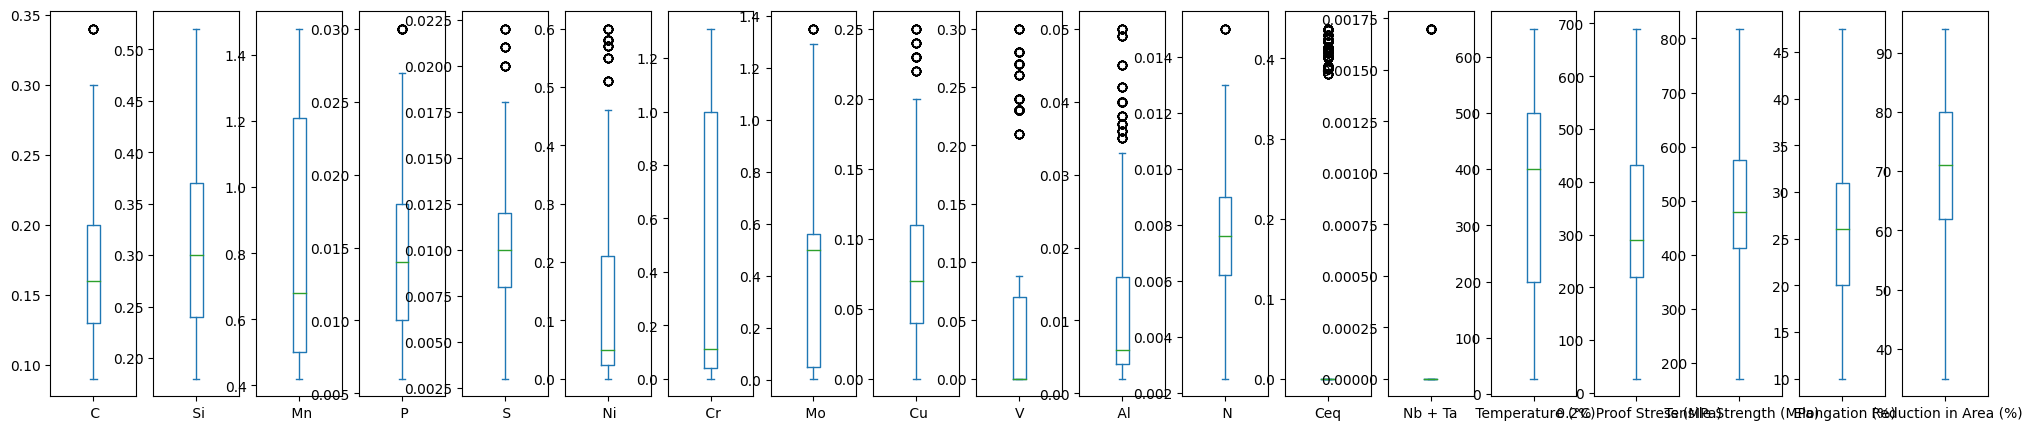

In [10]:
df.plot(kind='box',subplots=True,figsize=(25,5))

**Visualization**

<AxesSubplot: >

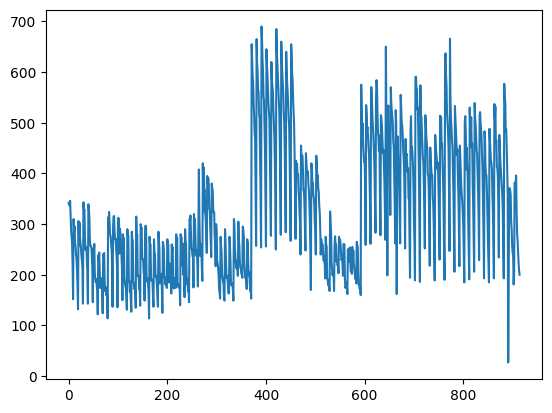

In [11]:
# plt.figure(figsize=(15,8))
df[' 0.2% Proof Stress (MPa)'].plot()

<AxesSubplot: >

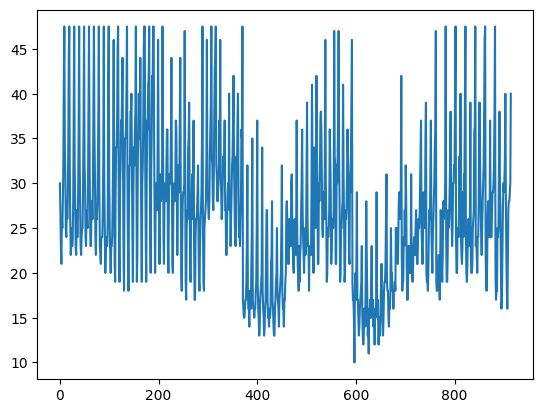

In [12]:
df[' Elongation (%)'].plot()

<AxesSubplot: >

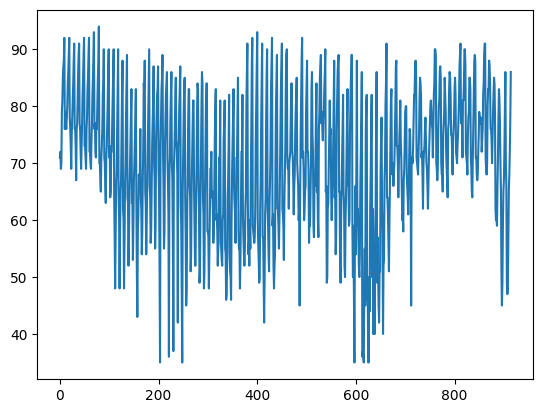

In [13]:
df[' Reduction in Area (%)'].plot()

<AxesSubplot: >

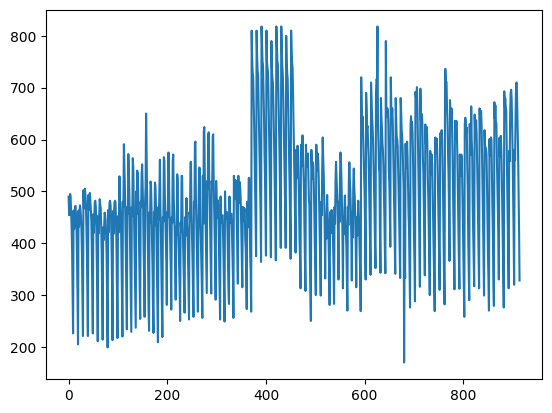

In [14]:
df[' Tensile Strength (MPa)'].plot()

As carbon percentange increases 'elongation %' and 'reduction in area %' decreases

Train _test split

In [15]:
x=df.iloc[:,:-4]
y=df.iloc[:,-4:]
train=df.iloc[300:]
test=df.iloc[:300]
train=train.sample(frac=1)

In [16]:
X_train=train.iloc[:,:-4]
X_test=test.iloc[:,:-4]
y_train=train.iloc[:,-4:]
y_test=test.iloc[:,-4:]
X_train

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C)
486,LaD,0.17,0.33,1.37,0.016,0.014,0.600,0.08,0.530,0.24,0.000,0.008,0.0071,0.000,0.0,400
516,MFA,0.12,0.25,0.48,0.008,0.012,0.040,0.64,0.510,0.04,0.000,0.006,0.0130,0.000,0.0,400
788,CbM,0.13,0.34,1.23,0.012,0.016,0.460,0.03,0.072,0.02,0.042,0.035,0.0065,0.387,0.0,400
458,VaR,0.30,0.27,0.70,0.012,0.012,0.440,1.10,1.350,0.11,0.270,0.003,0.0082,0.000,0.0,550
527,MFB,0.16,0.24,0.49,0.012,0.007,0.035,0.61,0.510,0.04,0.000,0.006,0.0086,0.000,0.0,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,CbA,0.15,0.30,1.14,0.009,0.021,0.310,0.20,0.080,0.14,0.000,0.028,0.0082,0.420,0.0,400
417,VaE,0.30,0.26,0.79,0.016,0.015,0.320,1.03,1.130,0.19,0.230,0.002,0.0085,0.000,0.0,500
336,CaG,0.29,0.20,0.93,0.014,0.015,0.030,0.03,0.360,0.06,0.000,0.018,0.0045,0.000,0.0,100
649,VbH,0.18,0.37,0.61,0.019,0.018,0.110,1.09,1.120,0.07,0.280,0.016,0.0064,0.000,0.0,500


In [17]:
# X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

**Feature scaling**

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss=StandardScaler()
x_train=ss.fit_transform(X_train.iloc[:,1:])
x_test=ss.transform(X_test.iloc[:,1:])


In [20]:
x_train=pd.DataFrame(x_train,columns=[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N','Ceq', 'Nb + Ta', ' Temperature (°C)'])
x_test=pd.DataFrame(x_test,columns=[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N','Ceq', 'Nb + Ta', ' Temperature (°C)'])

Model Creation

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor

In [22]:
lmodel=LinearRegression()
lmodel.fit(x_train,y_train)
y_predl=lmodel.predict(x_test)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [24]:
for i in range(4):
  lMAE=mean_absolute_error(y_test.iloc[:,i],y_predl[:,i])
  lMSE=mean_squared_error(y_test.iloc[:,i],y_predl[:,i])
  lR2=r2_score(y_test.iloc[:,i],y_predl[:,i])
  print(f'{y_test.columns[i]}: lMSE {lMSE**0.5} lMAE {lMAE} lR2 {lR2}',end='\n\n')

 0.2% Proof Stress (MPa): lMSE 57.24365847193221 lMAE 48.92686069220035 lR2 0.17403181919258837

 Tensile Strength (MPa): lMSE 81.76295139605492 lMAE 68.18997270881147 lR2 0.2627394033903908

 Elongation (%): lMSE 6.523071158274246 lMAE 5.07804269545568 lR2 0.30456392200451987

 Reduction in Area (%): lMSE 9.642662355025596 lMAE 7.59126137871038 lR2 0.3389007389103341



for linear regression R2 score is highly effected by the outliers, let's check for other alogorithms

 0.2% Proof Stress (MPa)    114.0
 Tensile Strength (MPa)     199.0
 Elongation (%)              17.0
 Reduction in Area (%)       35.0
dtype: float64  0.2% Proof Stress (MPa)    420.0
 Tensile Strength (MPa)     650.0
 Elongation (%)              47.5
 Reduction in Area (%)       94.0
dtype: float64


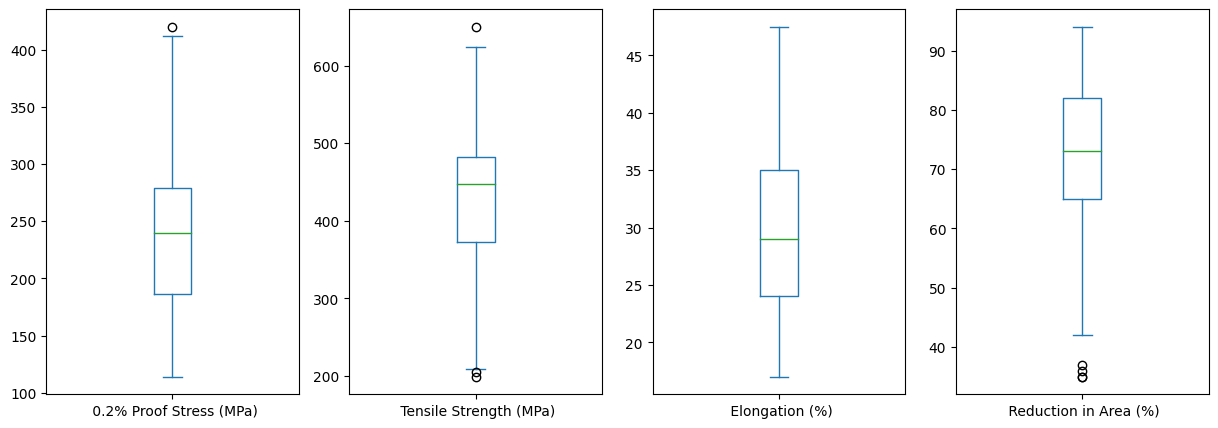

In [25]:
# plt.boxplot(y_test.iloc[:,3])
y_test.plot(subplots=True,kind='box',figsize=(15,5))
print(y_test.min(), y_test.max(),end='\n')

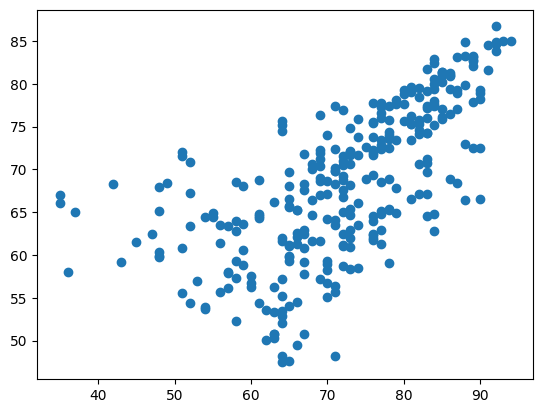

In [26]:
plt.scatter(y_test.iloc[:,3],y_predl[:,3])

Random Forest Regressor

In [27]:
# RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
rmodel=RandomForestRegressor()
rmodel.fit(x_train,y_train)
y_predr=rmodel.predict(x_test)

In [28]:
randomfor={}
for i in range(4):
  rMAE=mean_absolute_error(y_test.iloc[:,i],y_predr[:,i])
  rMSE=mean_squared_error(y_test.iloc[:,i],y_predr[:,i])
  rR2=r2_score(y_test.iloc[:,i],y_predr[:,i])
  # print(f'{y_test.columns[i]}: rMSE {rMSE**0.5} rMAE {rMAE} rR2 {rR2}',end='\n\n')
  randomfor[y_test.columns[i]]=[ rMSE**0.5,rMAE, rR2]
for k in randomfor:
  print(k,randomfor[k])

 0.2% Proof Stress (MPa) [50.727709469283155, 38.60426666666666, 0.3513669719982221]
 Tensile Strength (MPa) [53.002209214962605, 41.4595, 0.6901897031455295]
 Elongation (%) [4.812786718731674, 3.6928666666666663, 0.6214299806271515]
 Reduction in Area (%) [7.720042745995647, 6.225133333333333, 0.5762476086526483]


Random forest gives better result than linear regression algorithm

ExtraTreesRegressor



In [29]:
# RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
emodel=ExtraTreesRegressor()
emodel.fit(x_train,y_train)
y_prede=emodel.predict(x_test)

In [30]:
extrat={}
for i in range(4):
  eMAE=mean_absolute_error(y_test.iloc[:,i],y_prede[:,i])
  eMSE=mean_squared_error(y_test.iloc[:,i],y_prede[:,i])
  eR2=r2_score(y_test.iloc[:,i],y_prede[:,i])
  # print(f'{y_test.columns[i]}: eMSE {eMSE**0.5} eMAE {eMAE} eR2 {eR2}',end='\n\n')
  extrat[y_test.columns[i]]=[ eMSE**0.5,eMAE, eR2]
for k in extrat:
  print(k,extrat[k])

 0.2% Proof Stress (MPa) [47.149409706449845, 33.673366666666666, 0.4396478108227223]
 Tensile Strength (MPa) [54.252625334325224, 42.963033333333335, 0.6753993227207888]
 Elongation (%) [4.577105763106929, 3.647933333333334, 0.6575991133308006]
 Reduction in Area (%) [7.75469118233172, 6.207999999999999, 0.5724353743710764]


extra trees regressor works better for Elongation than random forest, other values are similar

AdaBoostRegressor

In [31]:
# RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
adaboost={}
for i in range(4):
  amodel=AdaBoostRegressor()
  amodel.fit(x_train,y_train.iloc[:,i])
  y_preda=amodel.predict(x_test)
  aMAE=mean_absolute_error(y_test.iloc[:,i],y_preda)
  aMSE=mean_squared_error(y_test.iloc[:,i],y_preda)
  aR2=r2_score(y_test.iloc[:,i],y_preda)
  adaboost[y_test.columns[i]]=[ aMSE**0.5,aMAE, aR2]
print(adaboost)

{' 0.2% Proof Stress (MPa)': [63.177344169441, 51.50991223205617, -0.00607714575376761], ' Tensile Strength (MPa)': [62.84740402982202, 48.187920960419454, 0.5644052962394451], ' Elongation (%)': [5.6189300160154945, 4.344508877038594, 0.4839874895056129], ' Reduction in Area (%)': [10.158929746890593, 8.325812226100831, 0.2662152765459883]}


In [32]:
for k in adaboost:
  print(k,adaboost[k])

 0.2% Proof Stress (MPa) [63.177344169441, 51.50991223205617, -0.00607714575376761]
 Tensile Strength (MPa) [62.84740402982202, 48.187920960419454, 0.5644052962394451]
 Elongation (%) [5.6189300160154945, 4.344508877038594, 0.4839874895056129]
 Reduction in Area (%) [10.158929746890593, 8.325812226100831, 0.2662152765459883]


GradientBoostingRegressor

In [33]:
# RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
GradientBoost={}
for i in range(4):
  gmodel=GradientBoostingRegressor()
  gmodel.fit(x_train,y_train.iloc[:,i])
  y_predg=gmodel.predict(x_test)
  gMAE=mean_absolute_error(y_test.iloc[:,i],y_predg)
  gMSE=mean_squared_error(y_test.iloc[:,i],y_predg)
  gR2=r2_score(y_test.iloc[:,i],y_predg)
  GradientBoost[y_test.columns[i]]=[ gMSE**0.5,gMAE, gR2]
for k in GradientBoost:
  print(k,GradientBoost[k])

 0.2% Proof Stress (MPa) [42.514984443740914, 32.4770897800816, 0.5443906771641609]
 Tensile Strength (MPa) [53.12919658870352, 40.914718068905955, 0.6887033830070652]
 Elongation (%) [4.499932068024348, 3.560995542306056, 0.6690480835416774]
 Reduction in Area (%) [8.142920784357095, 6.419794403333716, 0.5285526793970037]


gradient boost gives better result for Proof Stress than all of the above

Support Vector Regressor

In [34]:
s={}
for i in range(4):
  smodel=SVR()
  smodel.fit(x_train,y_train.iloc[:,i])
  y_preds=smodel.predict(x_test)
  sMAE=mean_absolute_error(y_test.iloc[:,i],y_preds)
  sMSE=mean_squared_error(y_test.iloc[:,i],y_preds)
  sR2=r2_score(y_test.iloc[:,i],y_preds)
  s[y_test.columns[i]]=[ sMSE**0.5,sMAE, sR2]
for k in s:
  print(k,s[k])

 0.2% Proof Stress (MPa) [115.26008489724224, 102.25004427327015, -2.3486242921442844]
 Tensile Strength (MPa) [122.36802722995041, 95.65950925917355, -0.651367833697905]
 Elongation (%) [7.439185370114738, 5.459608733465536, 0.09551004864211665]
 Reduction in Area (%) [9.33958698216748, 7.235159766532403, 0.3798052375347758]


DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
dmodel=DecisionTreeRegressor()
dmodel.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
y_predd=dmodel.predict(x_test)
for i in range(4):
  dMAE=mean_absolute_error(y_test.iloc[:,i],y_predd[:,i])
  dMSE=mean_squared_error(y_test.iloc[:,i],y_predd[:,i])
  dR2=r2_score(y_test.iloc[:,i],y_predd[:,i])
  print(f'{y_test.columns[i]}: rMSE {dMSE**0.5} rMAE {dMAE} rR2 {dR2}',end='\n\n')

 0.2% Proof Stress (MPa): rMSE 83.32496624661783 rMAE 59.31666666666667 rR2 -0.7500838052404193

 Tensile Strength (MPa): rMSE 66.2836329722504 rMAE 51.27333333333333 rR2 0.515470178912424

 Elongation (%): rMSE 7.9597424581452385 rMAE 5.765 rR2 -0.03550217953625756

 Reduction in Area (%): rMSE 11.664333099953321 rMAE 9.33 rR2 0.032630080763865976



HistGradientBoostingRegressor

In [37]:
histGradientBoost={}
for i in range(4):
  hmodel=HistGradientBoostingRegressor()
  hmodel.fit(x_train,y_train.iloc[:,i])
  y_predh=hmodel.predict(x_test)
  hMAE=mean_absolute_error(y_test.iloc[:,i],y_predh)
  hMSE=mean_squared_error(y_test.iloc[:,i],y_predh)
  hR2=r2_score(y_test.iloc[:,i],y_predh)
  histGradientBoost[y_test.columns[i]]=[ hMSE**0.5,hMAE, hR2]
for k in histGradientBoost:
  print(k,histGradientBoost[k]) #randomfor,extrat,adaboost,GradientBoost,s,histGradientBoost

 0.2% Proof Stress (MPa) [49.4810629656892, 36.99037314116326, 0.38285588133737825]
 Tensile Strength (MPa) [57.47768554504868, 45.45053457715211, 0.6356603406686199]
 Elongation (%) [8.020966568544614, 6.438587560792683, -0.05149302817778478]
 Reduction in Area (%) [9.5480316144776, 7.312201406765701, 0.3518128029280351]


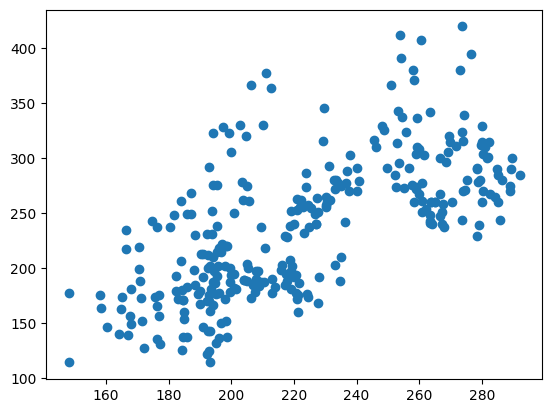

In [38]:
hmodel.fit(x_train,y_train.iloc[:,0])
y_predh=hmodel.predict(x_test)
plt.scatter(y_predh,y_test.iloc[:,0])

In [39]:
import xgboost
from sklearn.neighbors import KNeighborsRegressor

XGBRegressor

In [40]:
xg={}
for i in range(4):
  xmodel=xgboost.XGBRegressor()
  xmodel.fit(x_train,y_train.iloc[:,i])
  y_predx=xmodel.predict(x_test)
  xMAE=mean_absolute_error(y_test.iloc[:,i],y_predx)
  xMSE=mean_squared_error(y_test.iloc[:,i],y_predx)
  xR2=r2_score(y_test.iloc[:,i],y_predx)
  xg[y_test.columns[i]]=[ xMSE**0.5,xMAE, xR2]
for k in xg:
  print(k,xg[k])

 0.2% Proof Stress (MPa) [45.73127657110626, 35.094529724121095, 0.4728487962061253]
 Tensile Strength (MPa) [51.260682894362354, 41.0314442952474, 0.7102144813182655]
 Elongation (%) [7.427599838725879, 6.01030200958252, 0.09832509797531885]
 Reduction in Area (%) [11.54624498065616, 8.743591601053874, 0.05211797504786764]


KNeighborsRegressor

In [41]:
knn={}
for i in range(4):
  kmodel=KNeighborsRegressor()
  kmodel.fit(x_train,y_train.iloc[:,i])
  y_predk=kmodel.predict(x_test)
  kMAE=mean_absolute_error(y_test.iloc[:,i],y_predk)
  kMSE=mean_squared_error(y_test.iloc[:,i],y_predk)
  kR2=r2_score(y_test.iloc[:,i],y_predk)
  knn[y_test.columns[i]]=[ kMSE**0.5,kMAE, kR2]
for k in knn:
  print(k,knn[k])

 0.2% Proof Stress (MPa) [57.714330975936996, 43.882666666666665, 0.16039332129788153]
 Tensile Strength (MPa) [70.18461749794847, 54.79866666666666, 0.4567599524948621]
 Elongation (%) [6.120201521736574, 4.878666666666667, 0.3878125388165201]
 Reduction in Area (%) [8.08371201862115, 6.445333333333334, 0.5353837247443067]


LGBMRegressor

In [42]:
from lightgbm import LGBMRegressor

In [43]:
lgb={}
for i in range(4):
  kmodel=LGBMRegressor()
  kmodel.fit(x_train,y_train.iloc[:,i])
  y_predk=kmodel.predict(x_test)
  kMAE=mean_absolute_error(y_test.iloc[:,i],y_predk)
  kMSE=mean_squared_error(y_test.iloc[:,i],y_predk)
  kR2=r2_score(y_test.iloc[:,i],y_predk)
  lgb[y_test.columns[i]]=[ kMSE**0.5,kMAE, kR2]
for k in lgb:
  print(k,lgb[k])

 0.2% Proof Stress (MPa) [48.11439722488034, 36.24758857827756, 0.4164760956237157]
 Tensile Strength (MPa) [58.946472233020366, 46.902462013515205, 0.6168017281890036]
 Elongation (%) [7.972689618222715, 6.462569401860166, -0.03887357407017644]
 Reduction in Area (%) [9.56858803472567, 7.302221821094448, 0.3490187711645243]


Regression using Neural Network

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [45]:
sy=StandardScaler()
y_train_sc=sy.fit_transform(y_train)
y_test_sc=sy.transform(y_test)
y_train_sc=pd.DataFrame(y_train_sc,columns=y.columns)
y_test_sc=pd.DataFrame(y_test_sc,columns=y.columns)

In [46]:
# Building the Neural Network

model = Sequential()
model.add(Dense(units = 15, kernel_initializer = 'normal', activation = 'relu', input_dim = 15))
model.add(Dense(units = 225, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 150, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 75, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 30, kernel_initializer = 'normal', activation = 'relu'))
# model.add(Dense(units = 20, kernel_initializer = 'normal', activation = 'relu'))
# model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 4, kernel_initializer = 'normal', activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [47]:
history = model.fit(x_train, y_train_sc, batch_size = 20, shuffle=True, epochs = 750)
y_nn_pred_sc = model.predict(x_test)

Epoch 1/750
31/31 [==============================] - 2s 4ms/step - loss: 0.9817 - mean_squared_error: 0.9817
Epoch 2/750
31/31 [==============================] - 0s 4ms/step - loss: 0.6671 - mean_squared_error: 0.6671
Epoch 3/750
31/31 [==============================] - 0s 4ms/step - loss: 0.3465 - mean_squared_error: 0.3465
Epoch 4/750
31/31 [==============================] - 0s 3ms/step - loss: 0.2773 - mean_squared_error: 0.2773
Epoch 5/750
31/31 [==============================] - 0s 3ms/step - loss: 0.2356 - mean_squared_error: 0.2356
Epoch 6/750
31/31 [==============================] - 0s 3ms/step - loss: 0.2264 - mean_squared_error: 0.2264
Epoch 7/750
31/31 [==============================] - 0s 4ms/step - loss: 0.2170 - mean_squared_error: 0.2170
Epoch 8/750
31/31 [==============================] - 0s 4ms/step - loss: 0.2078 - mean_squared_error: 0.2078
Epoch 9/750
31/31 [==============================] - 0s 3ms/step - loss: 0.1885 - mean_squared_error: 0.1885
Epoch 10/750
31/31 

31/31 [==============================] - 0s 2ms/step - loss: 0.0767 - mean_squared_error: 0.0767
Epoch 76/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0790 - mean_squared_error: 0.0790
Epoch 77/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 78/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0721 - mean_squared_error: 0.0721
Epoch 79/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0742 - mean_squared_error: 0.0742
Epoch 80/750
31/31 [==============================] - 0s 2ms/step - loss: 0.0763 - mean_squared_error: 0.0763
Epoch 81/750
31/31 [==============================] - 0s 2ms/step - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 82/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 83/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0675 - mean_squared_error: 0.0675
Epoch 84/750
31/31 [===

31/31 [==============================] - 0s 3ms/step - loss: 0.0483 - mean_squared_error: 0.0483
Epoch 150/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0493 - mean_squared_error: 0.0493
Epoch 151/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0471 - mean_squared_error: 0.0471
Epoch 152/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0501 - mean_squared_error: 0.0501
Epoch 153/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0498 - mean_squared_error: 0.0498
Epoch 154/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0477 - mean_squared_error: 0.0477
Epoch 155/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 156/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 157/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0485 - mean_squared_error: 0.0485
Epoch 158/750
3

31/31 [==============================] - 0s 3ms/step - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 223/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 224/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 225/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 226/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 227/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0384 - mean_squared_error: 0.0384
Epoch 228/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 229/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 230/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 231/750
3

31/31 [==============================] - 0s 3ms/step - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 296/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 297/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 298/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 299/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 300/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 301/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 302/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 303/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 304/750
3

31/31 [==============================] - 0s 3ms/step - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 369/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 370/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 371/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 372/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 373/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 374/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 375/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 376/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 377/750
3

31/31 [==============================] - 0s 3ms/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 442/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 443/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 444/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 445/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 446/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 447/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 448/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 449/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 450/750
3

31/31 [==============================] - 0s 3ms/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 515/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 516/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 517/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 518/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 519/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 520/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 521/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 522/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 523/750
3

31/31 [==============================] - 0s 3ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 588/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 589/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 590/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 591/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 592/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 593/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 594/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 595/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 596/750
3

31/31 [==============================] - 0s 3ms/step - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 661/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 662/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 663/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 664/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 665/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 666/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 667/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 668/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 669/750
3

31/31 [==============================] - 0s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 734/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 735/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 736/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0066 - mean_squared_error: 0.0066
Epoch 737/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 738/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0039 - mean_squared_error: 0.0039
Epoch 739/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 740/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 741/750
31/31 [==============================] - 0s 3ms/step - loss: 0.0052 - mean_squared_error: 0.0052
Epoch 742/750
3

In [48]:
# Determining the model's accuracy
for i in range(4):
  r2_nn = r2_score(y_test_sc.iloc[:,i], y_nn_pred_sc[:,i])
  mse_nn = mean_squared_error(y_test_sc.iloc[:,i], y_nn_pred_sc[:,i])
  mae_nn = mean_absolute_error(y_test_sc.iloc[:,i], y_nn_pred_sc[:,i])
  print(f'{y_test.columns[i]}: mse_nn {mse_nn**0.5} mae_nn {mae_nn} r2_nn {r2_nn}',end='\n\n')
# print('R\u00b2_score = ' + str(round(r2_nn, 2)) + '              Higher is better')
# print('mean_squared_error = ' + str(round(mse_nn, 2)) + '    Lower is better')
# print('mean_absolute_error = ' + str(round(mae_nn, 2)) + '   Lower is better')

 0.2% Proof Stress (MPa): mse_nn 0.5667433114938333 mae_nn 0.3896656597621869 r2_nn -0.45530594433555116

 Tensile Strength (MPa): mse_nn 0.5920805807630031 mae_nn 0.4541463032191119 r2_nn 0.3668475550858009

 Elongation (%): mse_nn 0.7277335410606426 mae_nn 0.5822589493839962 r2_nn 0.4982822837471145

 Reduction in Area (%): mse_nn 0.6224315296209402 mae_nn 0.4737230637326157 r2_nn 0.5832042009224706



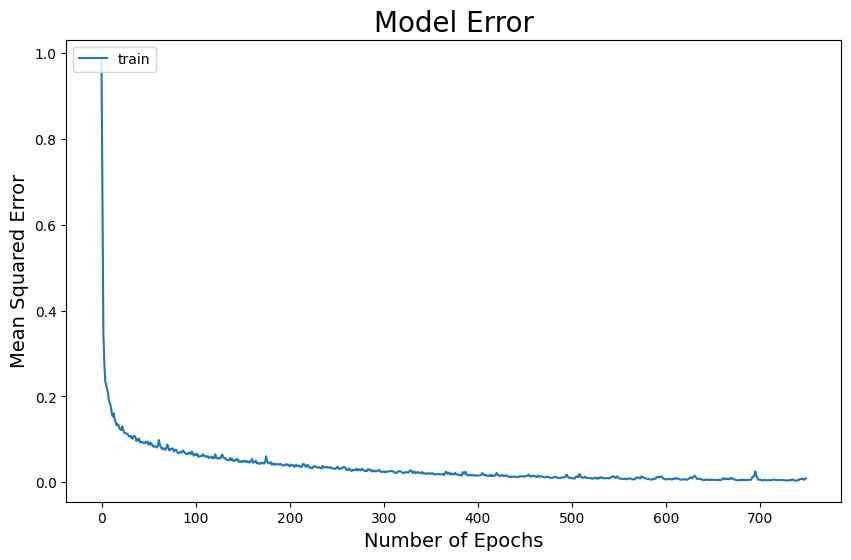

In [49]:
# Visualizing the model's learning history
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_squared_error'])
plt.title('Model Error', fontsize=20)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xlabel('Number of Epochs', fontsize=14)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
y_nn_pred = sy.inverse_transform(y_nn_pred_sc)
y_train=sy.inverse_transform(y_train_sc)
y_test=sy.inverse_transform(y_test_sc)
y_train=pd.DataFrame(y_train,columns=y.columns)
y_test=pd.DataFrame(y_test,columns=y.columns)

In [51]:
for i in range(4):
  r2_nn = r2_score(y_test.iloc[:,i], y_nn_pred[:,i])
  mse_nn = mean_squared_error(y_test.iloc[:,i], y_nn_pred[:,i])
  mae_nn = mean_absolute_error(y_test.iloc[:,i], y_nn_pred[:,i])
  print(f'{y_test.columns[i]}: mse_nn {mse_nn**0.5} mae_nn {mae_nn} r2_nn {r2_nn}',end='\n\n')

 0.2% Proof Stress (MPa): mse_nn 75.9841274504474 mae_nn 52.243061218261715 r2_nn -0.4553059821849412

 Tensile Strength (MPa): mse_nn 75.77050626681361 mae_nn 58.11860117594401 r2_nn 0.3668475644181107

 Elongation (%): mse_nn 5.540554617752229 mae_nn 4.432992769877116 r2_nn 0.49828225003493953

 Reduction in Area (%): mse_nn 7.656411847903984 mae_nn 5.827177314758301 r2_nn 0.5832042083743448



In [52]:
# Building the Neural Network

model = Sequential()
model.add(Dense(units = 15, kernel_initializer = 'normal', activation = 'relu', input_dim = 15))
model.add(Dense(units = 225, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 225, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 15, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 4, kernel_initializer = 'normal', activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [53]:
history = model.fit(x_train, y_train_sc, batch_size = 10, shuffle=True, epochs = 985)
y_nn_pred_sc = model.predict(x_test)

Epoch 1/985
62/62 [==============================] - 1s 3ms/step - loss: 0.9039 - mean_squared_error: 0.9039
Epoch 2/985
62/62 [==============================] - 0s 3ms/step - loss: 0.4976 - mean_squared_error: 0.4976
Epoch 3/985
62/62 [==============================] - 0s 3ms/step - loss: 0.3580 - mean_squared_error: 0.3580
Epoch 4/985
62/62 [==============================] - 0s 3ms/step - loss: 0.2917 - mean_squared_error: 0.2917
Epoch 5/985
62/62 [==============================] - 0s 4ms/step - loss: 0.2501 - mean_squared_error: 0.2501
Epoch 6/985
62/62 [==============================] - 0s 4ms/step - loss: 0.2243 - mean_squared_error: 0.2243
Epoch 7/985
62/62 [==============================] - 0s 2ms/step - loss: 0.2110 - mean_squared_error: 0.2110
Epoch 8/985
62/62 [==============================] - 0s 3ms/step - loss: 0.1948 - mean_squared_error: 0.1948
Epoch 9/985
62/62 [==============================] - 0s 3ms/step - loss: 0.1924 - mean_squared_error: 0.1924
Epoch 10/985
62/62 

62/62 [==============================] - 0s 2ms/step - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 76/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0627 - mean_squared_error: 0.0627
Epoch 77/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0659 - mean_squared_error: 0.0659
Epoch 78/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 79/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 80/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0638 - mean_squared_error: 0.0638
Epoch 81/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0595 - mean_squared_error: 0.0595
Epoch 82/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0574 - mean_squared_error: 0.0574
Epoch 83/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 84/985
62/62 [===

62/62 [==============================] - 0s 3ms/step - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 150/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 151/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0397 - mean_squared_error: 0.0397
Epoch 152/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 153/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 154/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 155/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 156/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0375 - mean_squared_error: 0.0375
Epoch 157/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 158/985
6

62/62 [==============================] - 0s 2ms/step - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 223/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 224/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 225/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 226/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 227/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 228/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 229/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 230/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 231/985
6

62/62 [==============================] - 0s 2ms/step - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 296/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 297/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 298/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 299/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 300/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 301/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 302/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 303/985
62/62 [==============================] - 0s 4ms/step - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 304/985
6

62/62 [==============================] - 0s 2ms/step - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 369/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 370/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 371/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 372/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 373/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 374/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 375/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 376/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 377/985
6

62/62 [==============================] - 0s 2ms/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 442/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 443/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 444/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 445/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 446/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 447/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 448/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 449/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 450/985
6

62/62 [==============================] - 0s 2ms/step - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 515/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 516/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 517/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 518/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 519/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 520/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 521/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 522/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 523/985
6

62/62 [==============================] - 0s 3ms/step - loss: 0.0046 - mean_squared_error: 0.0046
Epoch 588/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 589/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 590/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 591/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 592/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 593/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 594/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 595/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 596/985
6

62/62 [==============================] - 0s 2ms/step - loss: 0.0060 - mean_squared_error: 0.0060
Epoch 661/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 662/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 663/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 664/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0051 - mean_squared_error: 0.0051
Epoch 665/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 666/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 667/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 668/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 669/985
6

62/62 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 734/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 735/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 736/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 737/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 738/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 739/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 740/985
62/62 [==============================] - 0s 4ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 741/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 742/985
6

62/62 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_error: 0.0041
Epoch 807/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 808/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 809/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 810/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 811/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0035 - mean_squared_error: 0.0035
Epoch 812/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0029 - mean_squared_error: 0.0029
Epoch 813/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 814/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 815/985
6

62/62 [==============================] - 0s 3ms/step - loss: 9.6158e-04 - mean_squared_error: 9.6158e-04
Epoch 880/985
62/62 [==============================] - 0s 3ms/step - loss: 7.9549e-04 - mean_squared_error: 7.9549e-04
Epoch 881/985
62/62 [==============================] - 0s 4ms/step - loss: 7.6951e-04 - mean_squared_error: 7.6951e-04
Epoch 882/985
62/62 [==============================] - 0s 3ms/step - loss: 7.7414e-04 - mean_squared_error: 7.7414e-04
Epoch 883/985
62/62 [==============================] - 0s 2ms/step - loss: 8.1716e-04 - mean_squared_error: 8.1716e-04
Epoch 884/985
62/62 [==============================] - 0s 4ms/step - loss: 8.3676e-04 - mean_squared_error: 8.3676e-04
Epoch 885/985
62/62 [==============================] - 0s 4ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 886/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 887/985
62/62 [==============================] - 0s 4ms/step - loss: 0.0

62/62 [==============================] - 0s 3ms/step - loss: 6.6899e-04 - mean_squared_error: 6.6899e-04
Epoch 952/985
62/62 [==============================] - 0s 2ms/step - loss: 5.8136e-04 - mean_squared_error: 5.8136e-04
Epoch 953/985
62/62 [==============================] - 0s 2ms/step - loss: 9.2895e-04 - mean_squared_error: 9.2895e-04
Epoch 954/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_squared_error: 0.0010
Epoch 955/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 956/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 957/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0030 - mean_squared_error: 0.0030
Epoch 958/985
62/62 [==============================] - 0s 3ms/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 959/985
62/62 [==============================] - 0s 2ms/step - loss: 0.0041 - mean_squared_error

In [54]:
# Determining the model's accuracy
nn={}
for i in range(4):
  r2_nn = r2_score(y_test_sc.iloc[:,i], y_nn_pred_sc[:,i])
  mse_nn = mean_squared_error(y_test_sc.iloc[:,i], y_nn_pred_sc[:,i])
  mae_nn = mean_absolute_error(y_test_sc.iloc[:,i], y_nn_pred_sc[:,i])
  nn[y_test.columns[i]]=[ mse_nn**0.5,mae_nn, r2_nn]
  print(f'{y_test.columns[i]}: mse_nn {mse_nn**0.5} mae_nn {mae_nn} r2_nn {r2_nn}',end='\n\n')
# print('R\u00b2_score = ' + str(round(r2_nn, 2)) + '              Higher is better')
# print('mean_squared_error = ' + str(round(mse_nn, 2)) + '    Lower is better')
# print('mean_absolute_error = ' + str(round(mae_nn, 2)) + '   Lower is better')

 0.2% Proof Stress (MPa): mse_nn 0.48312459008391995 mae_nn 0.39743540942972577 r2_nn -0.0575472541048343

 Tensile Strength (MPa): mse_nn 0.5473348904832406 mae_nn 0.4395363168533088 r2_nn 0.4589306649828163

 Elongation (%): mse_nn 0.855638005468536 mae_nn 0.7052946344413672 r2_nn 0.30642283481977206

 Reduction in Area (%): mse_nn 0.9056780872375313 mae_nn 0.6757538944753047 r2_nn 0.11755451495040725



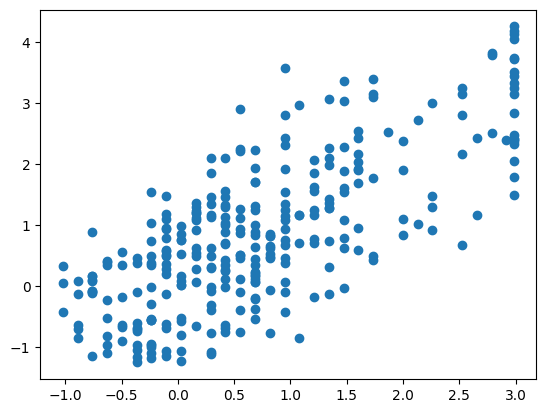

In [55]:
plt.scatter(y_test_sc.iloc[:,2],y_nn_pred_sc[:,2])

In [65]:
randofor=pd.DataFrame(randomfor,index=['MSE','MAE','R2_score']).transpose()
for i in [randomfor,extrat,adaboost,GradientBoost,s,histGradientBoost,xg,lgb,nn]:
    randofor=pd.concat([randofor,pd.DataFrame(i,index=['MSE','MAE','R2_score']).transpose()],axis=1)
    print(i,end='\n\n')
# randofor

{' 0.2% Proof Stress (MPa)': [50.727709469283155, 38.60426666666666, 0.3513669719982221], ' Tensile Strength (MPa)': [53.002209214962605, 41.4595, 0.6901897031455295], ' Elongation (%)': [4.812786718731674, 3.6928666666666663, 0.6214299806271515], ' Reduction in Area (%)': [7.720042745995647, 6.225133333333333, 0.5762476086526483]}

{' 0.2% Proof Stress (MPa)': [47.149409706449845, 33.673366666666666, 0.4396478108227223], ' Tensile Strength (MPa)': [54.252625334325224, 42.963033333333335, 0.6753993227207888], ' Elongation (%)': [4.577105763106929, 3.647933333333334, 0.6575991133308006], ' Reduction in Area (%)': [7.75469118233172, 6.207999999999999, 0.5724353743710764]}

{' 0.2% Proof Stress (MPa)': [63.177344169441, 51.50991223205617, -0.00607714575376761], ' Tensile Strength (MPa)': [62.84740402982202, 48.187920960419454, 0.5644052962394451], ' Elongation (%)': [5.6189300160154945, 4.344508877038594, 0.4839874895056129], ' Reduction in Area (%)': [10.158929746890593, 8.32581222610083

form above we can observe that histgradientboost gives best result for tensile Strength and elongation, where as gradientboost gives better result for Proof Stress and extratreesregressor for area % reduction.

4-0.9699,6-0.9567,2-0.8624,6-0.8538

1 - gradient, 2 - xg, 3- gradient

In [66]:
print(randofor.mean())

MSE         29.065687
MAE         22.495442
R2_score     0.559809
MSE         29.065687
MAE         22.495442
R2_score     0.559809
MSE         28.433458
MAE         21.623083
R2_score     0.586270
MSE         35.450652
MAE         28.092039
R2_score     0.327133
MSE         27.071758
MAE         20.843149
R2_score     0.607674
MSE         63.601721
MAE         52.651081
R2_score    -0.631169
MSE         31.131937
MAE         24.047924
R2_score     0.329709
MSE         28.991451
MAE         22.719967
R2_score     0.333377
MSE         31.150537
MAE         24.228710
R2_score     0.335856
MSE          0.697944
MAE          0.554505
R2_score     0.206340
dtype: float64


Overall R2_score for

ExtratreeRegressor=0.887083,

gradientboost=0.889736,

histgradientboost=0.904452

hence histgradientboost is a best algorithm to predict material property according to alloy components and temprature.

In [58]:
randofor.iloc[:,20]

 0.2% Proof Stress (MPa)    0.382856
 Tensile Strength (MPa)     0.635660
 Elongation (%)            -0.051493
 Reduction in Area (%)      0.351813
Name: R2_score, dtype: float64

 0.2% Proof Stress (MPa)       AxesSubplot(0.125,0.11;0.168478x0.77)
 Tensile Strength (MPa)     AxesSubplot(0.327174,0.11;0.168478x0.77)
 Elongation (%)             AxesSubplot(0.529348,0.11;0.168478x0.77)
 Reduction in Area (%)      AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

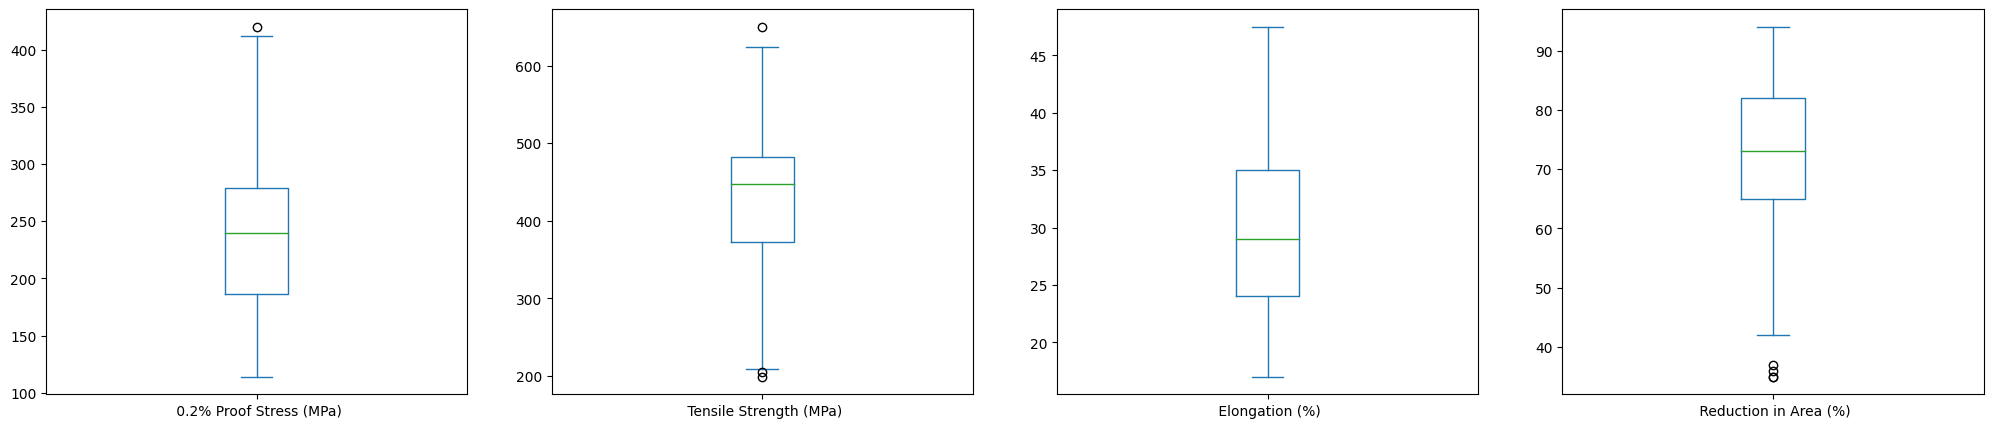

In [59]:
y_test.plot(kind='box',subplots=True,figsize=(25,5))

accuracy highly depends on training data for training data of first 700 rows models gives best accuracy for proof stress and tensile strength for training data last 700 rows gives best accuracy of elongation and area reduction.

In [60]:
import pandas as pd

In [82]:
for i in range(0,30,3):
    print(randofor.iloc[:,i+2:i+3])

                          R2_score
 0.2% Proof Stress (MPa)  0.351367
 Tensile Strength (MPa)   0.690190
 Elongation (%)           0.621430
 Reduction in Area (%)    0.576248
                          R2_score
 0.2% Proof Stress (MPa)  0.351367
 Tensile Strength (MPa)   0.690190
 Elongation (%)           0.621430
 Reduction in Area (%)    0.576248
                          R2_score
 0.2% Proof Stress (MPa)  0.439648
 Tensile Strength (MPa)   0.675399
 Elongation (%)           0.657599
 Reduction in Area (%)    0.572435
                          R2_score
 0.2% Proof Stress (MPa) -0.006077
 Tensile Strength (MPa)   0.564405
 Elongation (%)           0.483987
 Reduction in Area (%)    0.266215
                          R2_score
 0.2% Proof Stress (MPa)  0.544391
 Tensile Strength (MPa)   0.688703
 Elongation (%)           0.669048
 Reduction in Area (%)    0.528553
                          R2_score
 0.2% Proof Stress (MPa) -2.348624
 Tensile Strength (MPa)  -0.651368
 Elongation (%)     

In [91]:
import pickle

modelfilename = 'pickles/gradientboost.pkl'
pickle.dump(gmodel, open(modelfilename, 'wb'))

scalerfilename = 'pickles/scaler.pkl'
pickle.dump(ss, open(scalerfilename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(modelfilename, 'rb'))
# ss.transform(X_test.iloc[:,1:])
result = loaded_model.score(x_test, y_test.iloc[:,3])
print(result)

0.5285526793970037


In [93]:
GradientBoost={}
for i in range(4):
    gmodel=GradientBoostingRegressor()
    gmodel.fit(x_train,y_train.iloc[:,i])
    y_predg=gmodel.predict(x_test)
    
    modelfilename = f'pickles/gradientboost{i}.pkl'
    pickle.dump(gmodel, open(modelfilename, 'wb'))
    
    gMAE=mean_absolute_error(y_test.iloc[:,i],y_predg)
    gMSE=mean_squared_error(y_test.iloc[:,i],y_predg)
    gR2=r2_score(y_test.iloc[:,i],y_predg)
    GradientBoost[y_test.columns[i]]=[ gMSE**0.5,gMAE, gR2]
for k in GradientBoost:
    print(k,GradientBoost[k])

 0.2% Proof Stress (MPa) [42.63354762221123, 32.592474650495376, 0.5418459832456575]
 Tensile Strength (MPa) [53.42383476566305, 40.86579012988474, 0.6852410986620172]
 Elongation (%) [4.502765410020298, 3.581265415870461, 0.668631190505711]
 Reduction in Area (%) [8.074152757454067, 6.360352893686197, 0.5364819237553395]


In [95]:
df.columns

Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

In [100]:
modelfilename = f'pickles/gradientboost{1}.pkl'
loaded_model = pickle.load(open(modelfilename, 'rb'))
scaler = pickle.load(open('pickles/scaler.pkl','rb'))
data = scaler.transform([df.iloc[910,1:16]])
loaded_model.predict(data)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([647.85709967])

In [97]:
df

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,27,342,490,30.0,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,100,338,454,27.0,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,200,337,465,23.0,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,300,346,495,21.0,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.610,0.04,0.000,0.003,0.0066,0.0,0.0000,400,316,489,26.0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,350,268,632,28.0,65
911,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,400,244,575,28.0,68
912,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,450,224,500,29.0,72
913,CCB,0.22,0.22,1.24,0.021,0.008,0.030,0.05,0.017,0.01,0.005,0.005,0.0116,0.0,0.0017,500,209,428,30.0,78
